# AIPI 510 TA4: EDA
Authors: Jason Lee, Andrew Jin
Date: September 23rd, 2024

To run the code, please ensure you have all packages in the requirements.txt file installed. No other packages are necessary

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

### Description of Dataset (Context & Sampling)

The following data is sourced from Welltory's COVID-19 and Wearables Open Data Resaerch dataset, which examines patient's progression and recovery from COVID-19. Features involved include symptoms, heart rate variability, blood pressure, sleep, as well as caloric data. 

The data was sampled from the Welltory app, a wellness platform that tracks and provides users with data about their wellbeing. This is a form of convenience sampling (data was collected from an existing pool of the app's users) which may lead to some selection bias (the general population of the dataset is likely younger individuals who use their smartphones more frequently). This means that results may not be interpretable for the adolescent and elderly population, who are likely the most impacted from COVID-19.

The GitHub repository with the dataset can be found at the following link: https://github.com/Welltory/hrv-covid19/tree/master

To interpret the columns across the CSV files, you can reference: https://github.com/Welltory/hrv-covid19/blob/master/datatypes.md 

## EDA

Discussion of findings from each section can be found at the bottom of the section

We read two CSVs from our dataset. 

The 'surveys' dataframe contains self-reported symptoms that users recorded in the Welltory app. It contains several scales, corresponding to a specific type of symptom or condition, and a user-provided rating for each scale that corresponds to the severity of the symptom or condition. A text interpretation of the scale-value pair is also provided for further context. 

The 'blood_pressure' dataframe contains information about the user's blood pressure, including the diastolic and systolic blood pressure, as well as more granular indexes such as FCI, BCE, Kerdo, and Robinson's index. 

In [2]:
## Read Data from GitHub repo:

surveys = pd.read_csv('https://raw.githubusercontent.com/Welltory/hrv-covid19/refs/heads/master/data/surveys.csv')
blood_pressure = pd.read_csv('https://raw.githubusercontent.com/Welltory/hrv-covid19/refs/heads/master/data/blood_pressure.csv')

### Data Structure
Column names and data types

In [3]:
surveys.head()

,user_code,scale,created_at,value,text
0,01bad5a519,S_CORONA,2020-04-23,2,Symptoms are characteristic of coronavirus
1,01bad5a519,S_COVID_BLUISH,2020-04-23,1,User isn’t experiencing symptom
2,01bad5a519,S_COVID_BLUISH,2020-04-25,1,User isn’t experiencing symptom
3,01bad5a519,S_COVID_BLUISH,2020-04-27,1,User isn’t experiencing symptom
4,01bad5a519,S_COVID_BLUISH,2020-04-29,1,User isn’t experiencing symptom


In [4]:
## Exploring the columns in surveys

print("Data Structure of 'survey' dataframe")
for column in surveys.columns:
    print(f'Column Name: {column}, Data Type: {surveys[column].dtypes}')

Data Structure of 'survey' dataframe
Column Name: user_code, Data Type: object
Column Name: scale, Data Type: object
Column Name: created_at, Data Type: object
Column Name: value, Data Type: int64
Column Name: text, Data Type: object


The surveys dataset contains 5 columns, with the user_code, scale, and created_at forming the primary key. The dataset provides numerical information about a user's condition on any given day as evaluated by the given scale. 'value' is the only numerical column, and the rest are string (object) columns

In [5]:
blood_pressure.head()

,user_code,measurement_datetime,diastolic,systolic,functional_changes_index,circulatory_efficiency,kerdo_vegetation_index,robinson_index
0,01bad5a519,2020-04-29 22:33:33,100,150,NaN,NaN,NaN,NaN
1,01bad5a519,2020-04-30 01:33:33,100,150,NaN,NaN,NaN,NaN
2,01bad5a519,2020-04-30 09:16:38,95,140,3.38,4545.0,6.0,141.4
3,01bad5a519,2020-04-30 12:16:38,95,140,NaN,NaN,NaN,NaN
4,01bad5a519,2020-05-01 06:58:06,80,130,2.89,4000.0,NaN,104.0


In [6]:
## Exploring the columns in blood_pressure dataframe

print("Data Structure of 'blood_pressure' dataframe")
for column in blood_pressure.columns:
    print(f'Column Name: {column}, Data Type: {blood_pressure[column].dtypes}')

Data Structure of 'blood_pressure' dataframe
Column Name: user_code, Data Type: object
Column Name: measurement_datetime, Data Type: object
Column Name: diastolic, Data Type: int64
Column Name: systolic, Data Type: int64
Column Name: functional_changes_index, Data Type: float64
Column Name: circulatory_efficiency, Data Type: float64
Column Name: kerdo_vegetation_index, Data Type: float64
Column Name: robinson_index, Data Type: float64


The blood pressure dataset contains 8 columns, with the user_code and measurement_datetime forming the primary key. The dataset provides various metrics of a user's blood pressure on any given day. Excluding the primary key columns, all other columns are numerical, either integers or floats

### Descriptive Statistics

Distribution of values across columns

##### Surveys Dataset

In [7]:
print('Descriptive Statistics of Categorical Columns')
# Select only categorical columns
categorical_columns = surveys.select_dtypes(include='object').columns
description_df = pd.DataFrame()

for column in categorical_columns:
    desc = surveys[column].describe()
    desc_df = pd.DataFrame(desc).transpose()
    description_df = pd.concat([description_df, desc_df])
description_df

Descriptive Statistics of Categorical Columns


,count,unique,top,freq
user_code,2259,111,6be5033971,127
scale,2259,58,S_COVID_FATIGUE,209
created_at,2259,50,2020-05-03,112
text,2259,65,User isn’t experiencing symptom,732


Descriptive Statistics of survey response values

Mean survey response value:  2.364763169544046
Standard Deviation of survey response value: : 1.5549337387583468


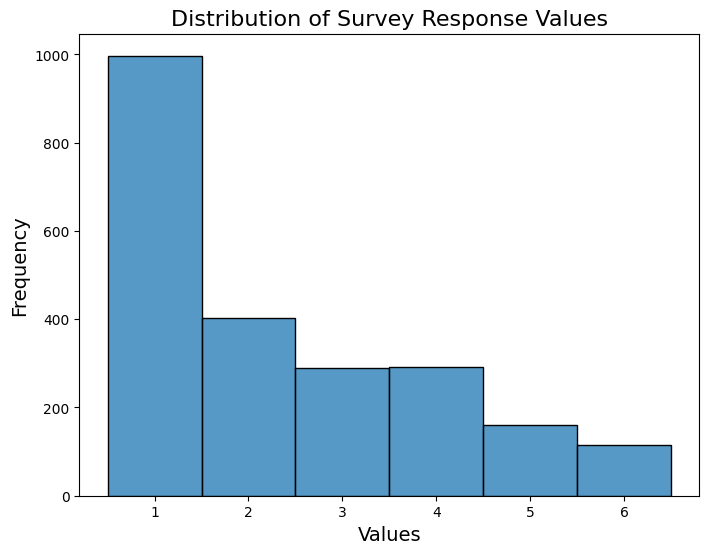

In [8]:

print('Descriptive Statistics of survey response values\n')
print("Mean survey response value: ", surveys['value'].mean())
print("Standard Deviation of survey response value: :", surveys['value'].std())


# Create a figure with a set size
plt.figure(figsize=(8, 6))

# Plotting the distribution as a barplot/histogram using seaborn
sns.histplot(surveys['value'], discrete=True, kde=False)

# Setting labels and title
plt.title('Distribution of Survey Response Values', fontsize=16)
plt.xlabel('Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.show()


Above are descriptive statistics of the surveys dataset. The user code with most data entry is 6be5033971, the symptom/scale with most data entries is S_COVID_FATIGUE, which measures the user's fatigue. May 3rd, 2020 had the most data entries, and the most popular condition inputted is 'no experience of symptoms'. Accordingly, the majority of survey response values are 1, which represents the lowest intensity for a given scale. The distribution is also right-skewed, meaning that the distribution's tendency leans towards less symptomatic users.

##### Blood Pressure Dataset

In [9]:
print('Descriptive Statistics of Categorical Columns')
# Select only categorical columns
categorical_columns = blood_pressure.select_dtypes(include='object').columns
description_df = pd.DataFrame()

for column in categorical_columns:
    desc = blood_pressure[column].describe()
    desc_df = pd.DataFrame(desc).transpose()
    description_df = pd.concat([description_df, desc_df])
description_df

Descriptive Statistics of Categorical Columns


,count,unique,top,freq
user_code,721,28,a1c2e6b2eb,333
measurement_datetime,721,719,2020-05-11 00:27:56,2


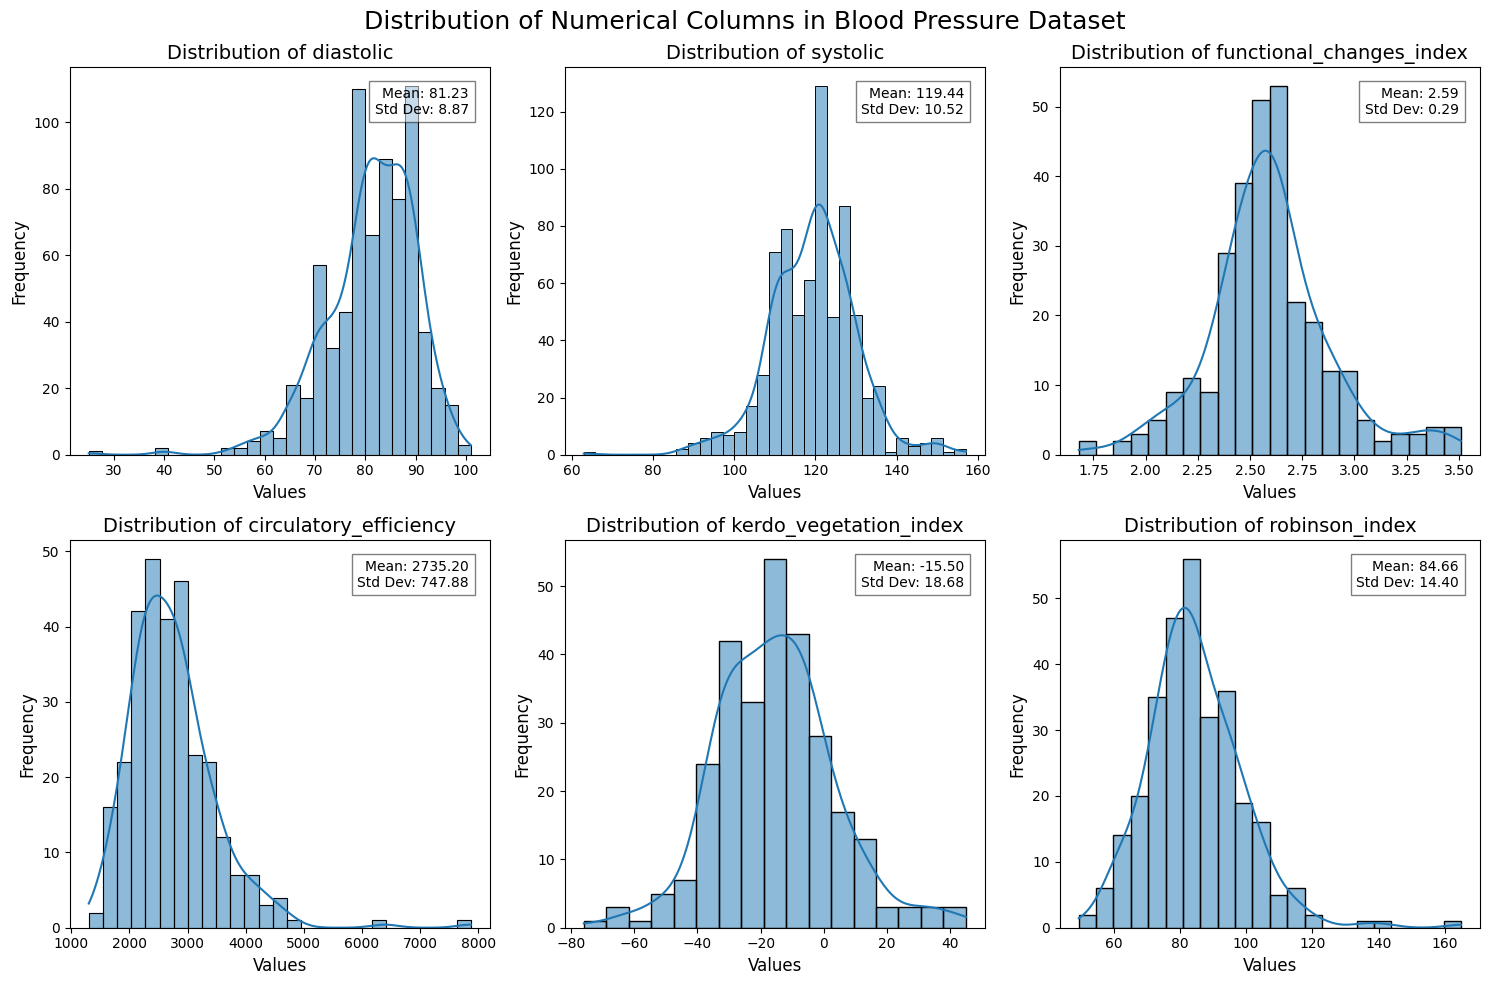

In [10]:
# Select only numeric columns
numeric_columns = blood_pressure.select_dtypes(include='number').columns

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column as a histogram
for i, col in enumerate(numeric_columns):
    mean_value = blood_pressure[col].mean()
    std_value = blood_pressure[col].std()
    sns.histplot(blood_pressure[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('Values', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    # Add mean and standard deviation as text in the plot
    text_str = f'Mean: {mean_value:.2f}\nStd Dev: {std_value:.2f}'
    axes[i].text(0.95, 0.95, text_str, fontsize=10, 
                 verticalalignment='top', horizontalalignment='right', 
                 transform=axes[i].transAxes, bbox=dict(facecolor='white', alpha=0.5))


plt.suptitle("Distribution of Numerical Columns in Blood Pressure Dataset", fontsize = 18)
# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


Above are descriptive statistics of the blood pressure dataset. Unlike the survey dataset, the user code with most data entry is a1c2e6b2eb. Observing the distribution of various blood pressure metrics, we note that they are largely Gaussian (normal). In the case of circulatory_efficiency, robinson_index, and diastolic, a few outliers make the distribution look skewed, but the underlying distribution is otherwise Gaussian. 

### Data Quality
Examining null values, outliers, etc.

##### Null Values

In [11]:
print("Null Values in 'surveys' dataset")
null_counts = surveys.isnull().mean()
print(null_counts)

Null Values in 'surveys' dataset
user_code     0.0
scale         0.0
created_at    0.0
value         0.0
text          0.0
dtype: float64


In [12]:
print("Null Values in 'blood_pressure' dataset")
null_counts = blood_pressure.isnull().mean()
print(null_counts)

Null Values in 'blood_pressure' dataset
user_code                   0.000000
measurement_datetime        0.000000
diastolic                   0.000000
systolic                    0.000000
functional_changes_index    0.585298
circulatory_efficiency      0.585298
kerdo_vegetation_index      0.607490
robinson_index              0.585298
dtype: float64


The surveys dataset has no null values. However, the blood pressure dataset has outliers, specifically in the columns corresponding to blood pressure indexes FCI, BCE, Kerdo & Robinson. A considerable 58~60% of the data entries in these columns are null, meaning we need to take special care when dealing with these null values later

##### Outliers

Examining outliers in 'blood_pressure' dataset


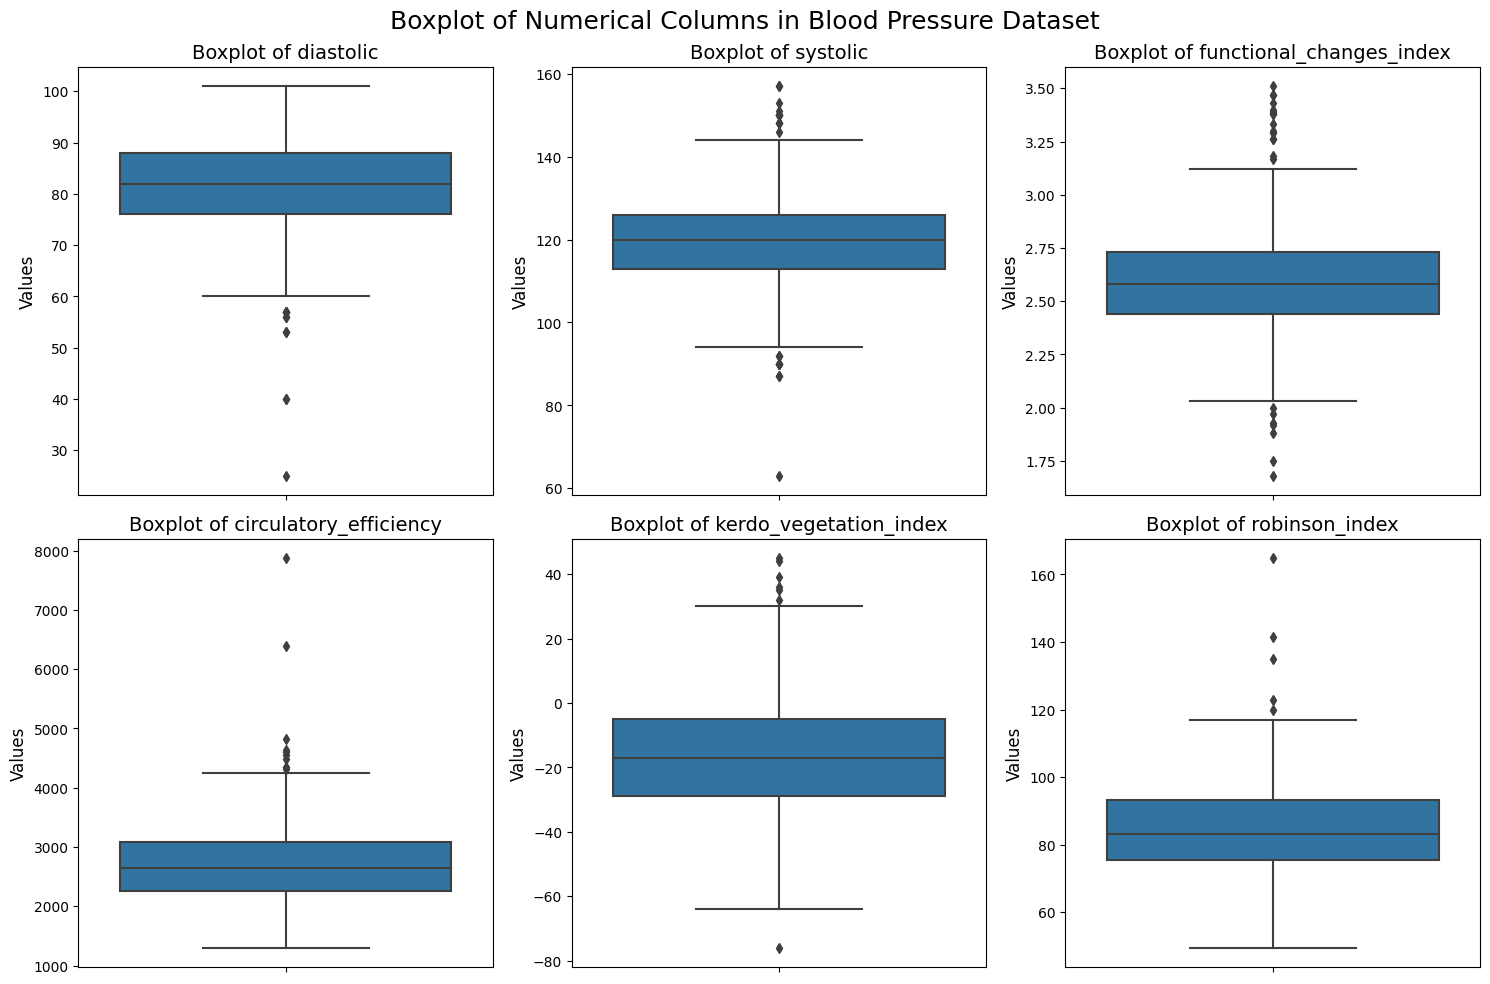

In [13]:
print("Examining outliers in 'blood_pressure' dataset")

# Select only numeric columns
numeric_columns = blood_pressure.select_dtypes(include='number').columns

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column as a histogram
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=blood_pressure, y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=14)
    axes[i].set_ylabel('Values', fontsize=12)

plt.suptitle("Boxplot of Numerical Columns in Blood Pressure Dataset", fontsize = 18)
# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


We use a boxplot to visually examine potential outliers across the blood pressure dataset. We note that all columns have potential outliers, with some notable outliers in circulatory_efficiency (BCE), systolic BP, diastolic BP, and Robinson Index. 

Given that in surveys, the only numerical column 'value' is essentially discrete/categorical (user-reported values between 1-6) there will be no notable outliers. 

### Variable Relationships
Examining any correlations in the data


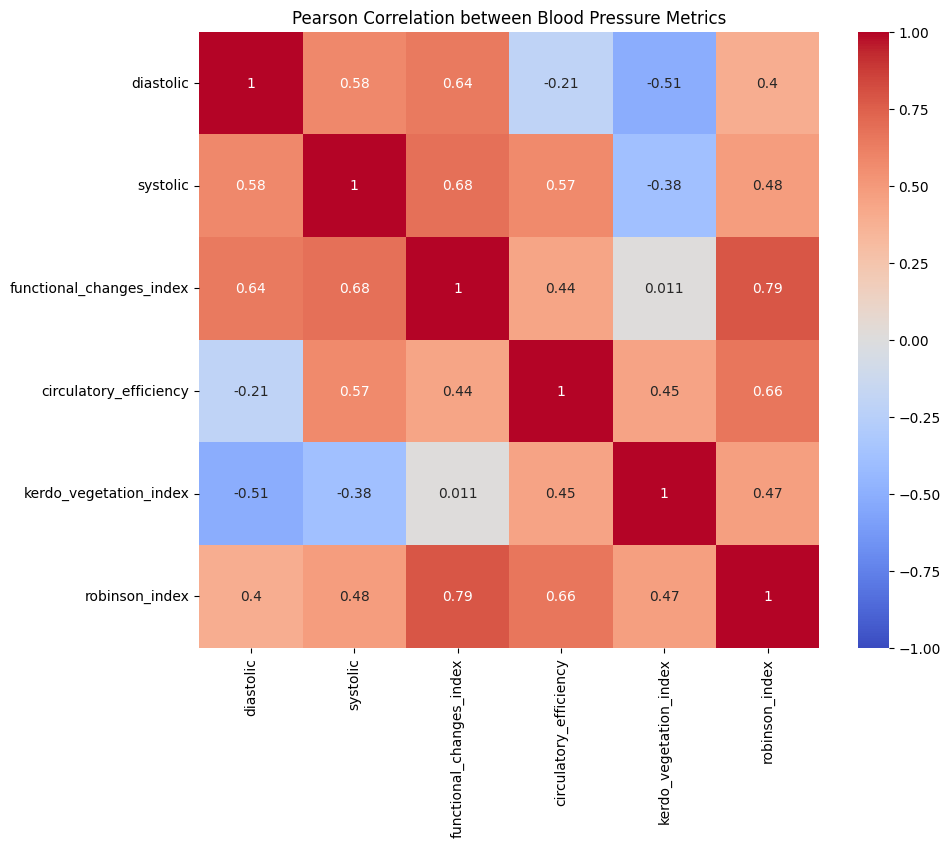

In [14]:
numeric_columns = blood_pressure.select_dtypes(include='number')

# Calculate Pearson correlation
correlation_matrix = numeric_columns.corr(method='pearson')

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Show the plot
plt.title('Pearson Correlation between Blood Pressure Metrics')
plt.show()


We use a heatmap of pearson correlations to examine variable relationship in the blood pressure dataset. Cells with higher magnitude signify variables with higher linear correlation. Based on the modelling we want to do, this could be signal of potential multicollinearity issues.

It is interesting to note the high positive correlation between functional_changes_index and robinson_index/diastolic BP/systolic BP. Given that FCI seems to have a high linear correlation with several other columns, this may pose an issue during modelling. Other relationships to note include the relationship between circulatory_efficiency and robinson_index 

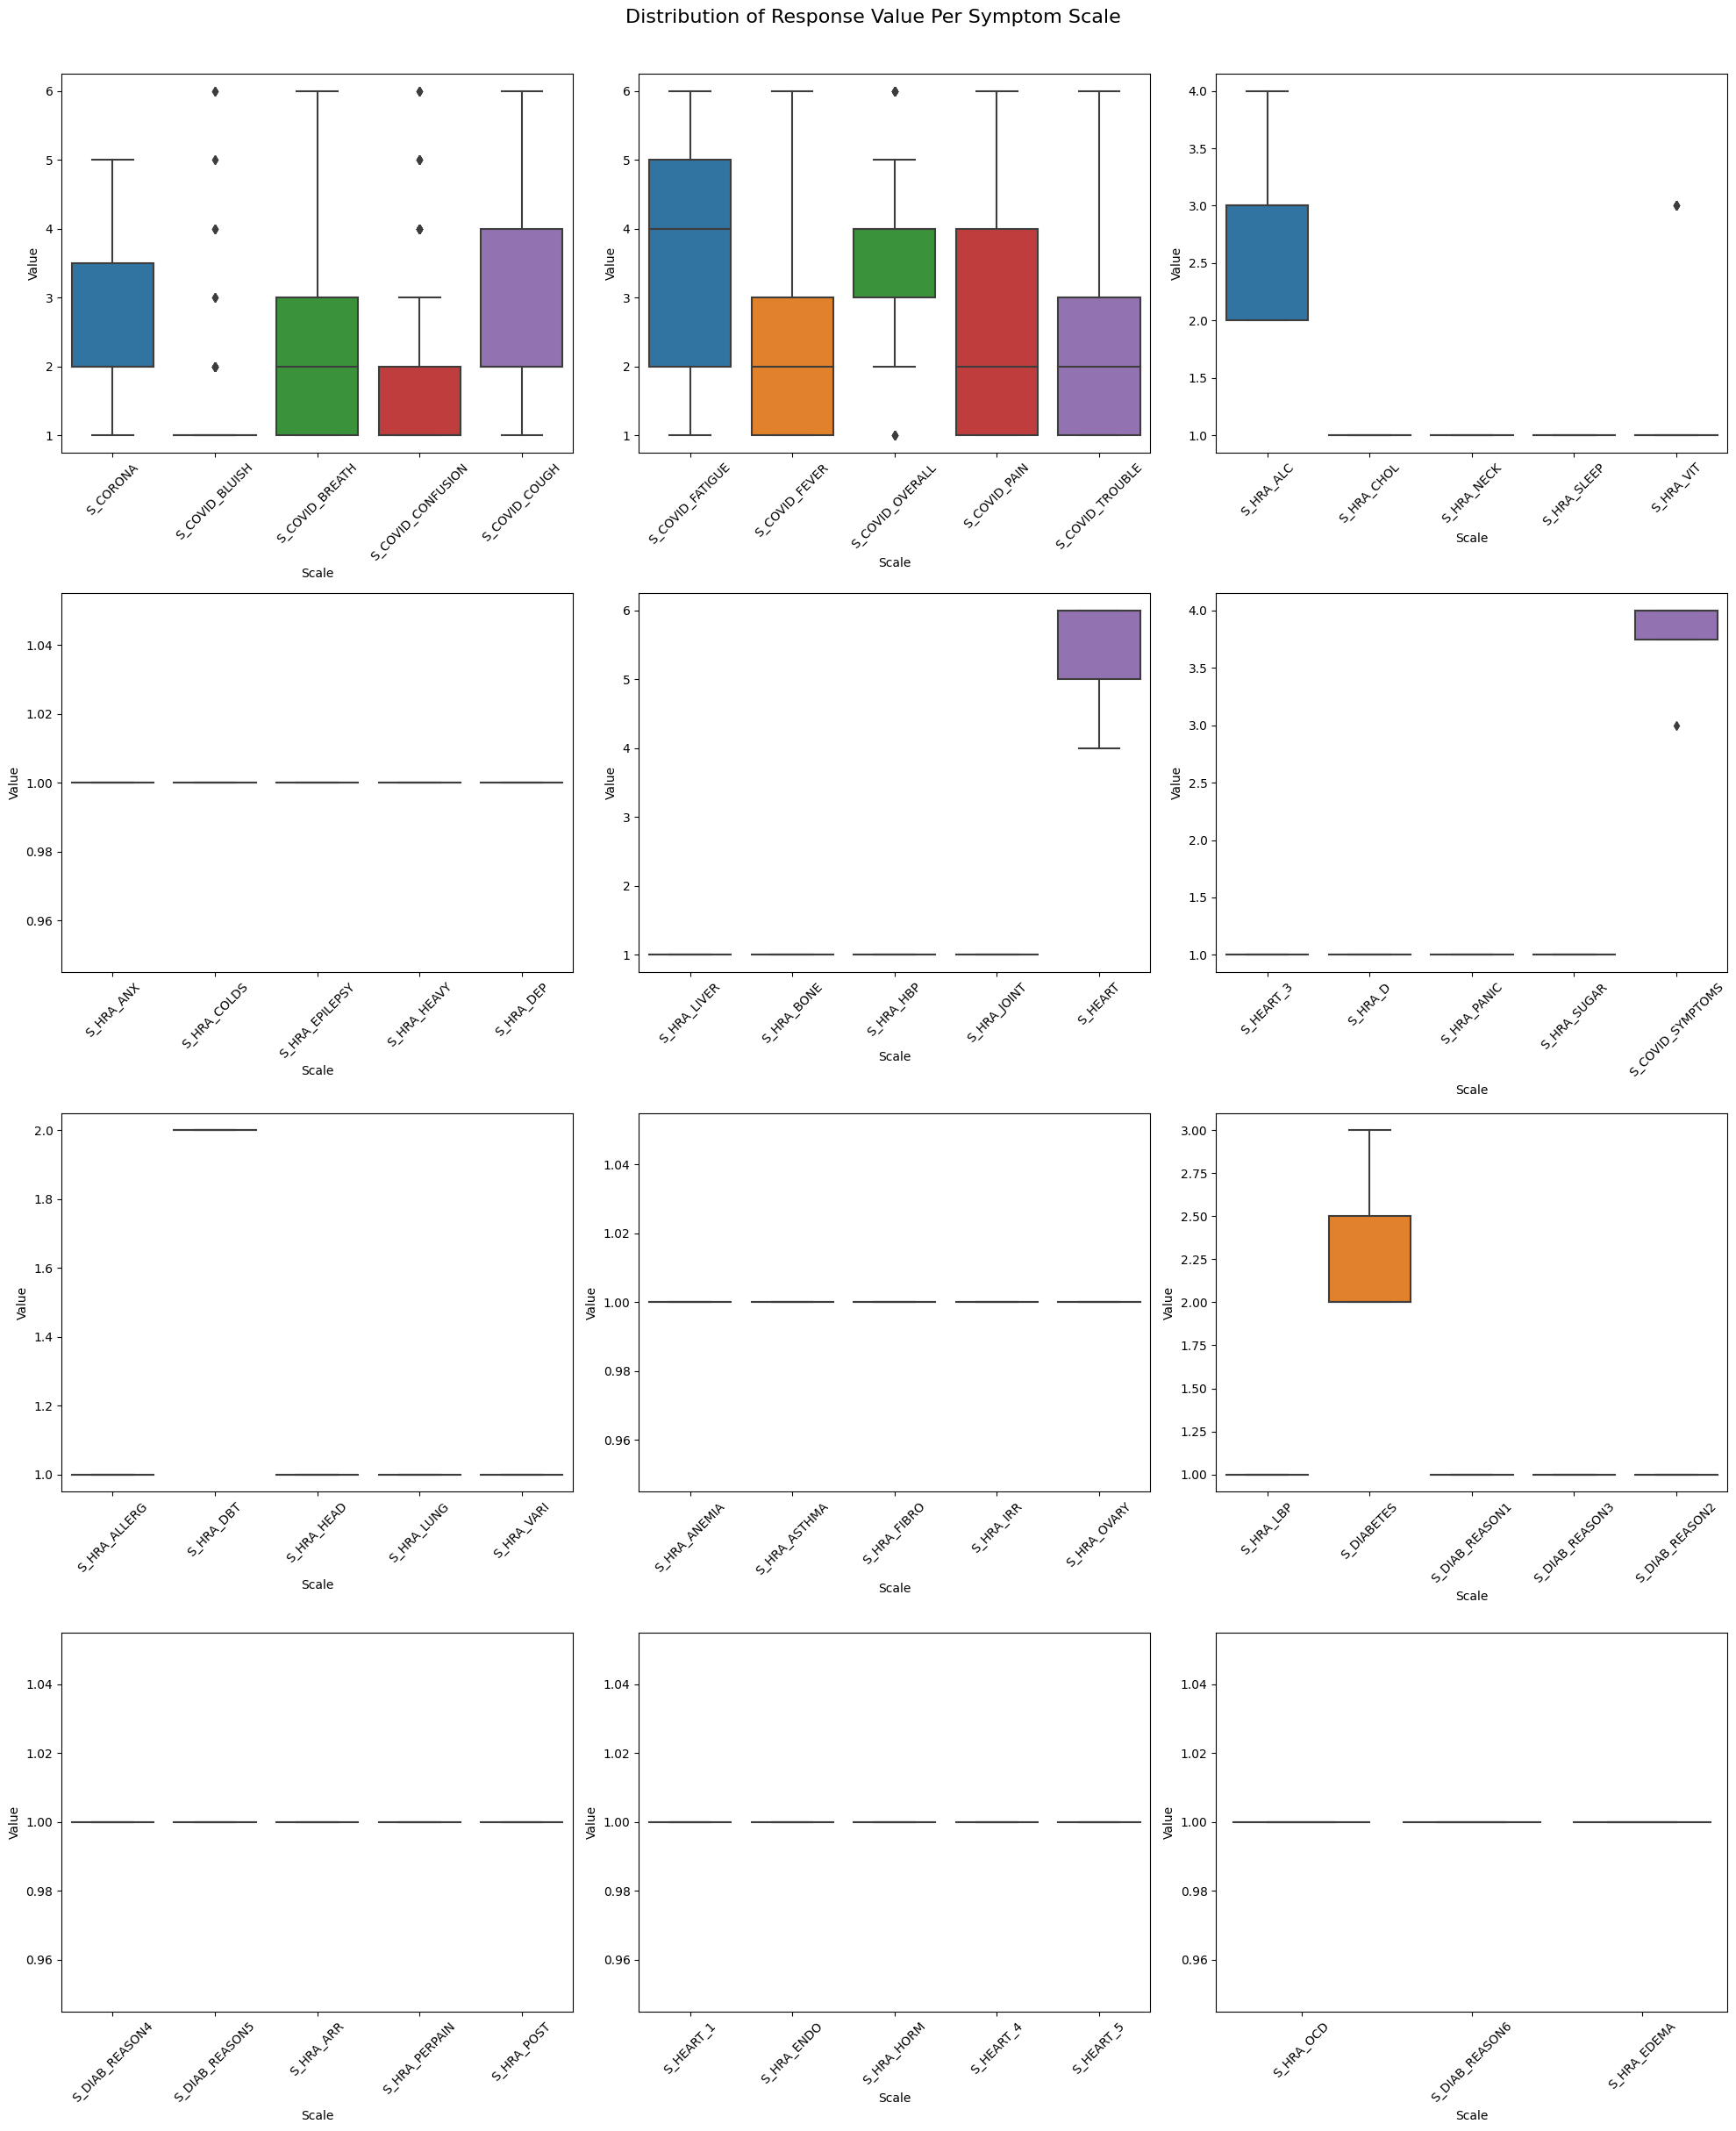

In [15]:
# Create a box plot
unique_scales = surveys['scale'].unique()
n_subplots = (len(unique_scales) + 5 - 1) // 5
n_rows = (n_subplots + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(20, 6 * n_rows))

axes = axes.flatten()

for i in range(n_subplots):
    start = i * 5
    end = start + 5
    scales_to_plot = unique_scales[start:end]

    sns.boxplot(x='scale', y='value', data=surveys[surveys['scale'].isin(scales_to_plot)], ax=axes[i])
    axes[i].set_xlabel('Scale')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel('Value')

plt.suptitle('Distribution of Response Value Per Symptom Scale', fontsize=16, y=1.01)
plt.tight_layout()
plt.show()


Within the surveys dataset, we look at the relationship between symptom scale and user-reported values. To do so, we plot a boxplot where the x-axes is each unique scale value and the y-axes is the boxplot of survey response values corresponding to that scale. 

Interestingly, a majority of scales seem to have only one unique survey response values: 1. While the histogram of survey response values across the entire dataset seems to indicate that survey response values are relatively spread out between 1-6 (with a slight right skew towards 1), the reality is that this is because most scales only have a response value of 1 to begin with. Due to the high intra-scale cardinality, if we ever transform 'surveys' so that each scale is its own column, many of the columns may contain redudant information due to cardinality issues

## Data Cleaning

### Handling Outliers

We visualized potential outliers in the blood_pressure dataset during EDA. Given that our distributions are largely Gaussian (as visually depicted by their histograms), we use the standard deviation method to generate a list of candidate outliers. However, not all outliers are necessarily due to measurement or data entry errors. Given that we are dealing with potential patients, there is room for "true outliers". 

For each blood pressure metric in our 'blood_pressure' dataset, we research the usual lower and upper bound of reasonable/plausible values. All values outside of this range are considered errors in data collection, and either removed or imputed to the patient's mean value. All outliers within a reasonable bound of possible values are considered 'true outliers' rather than 'errors' (not all outliers are evil) 

The indices used by the Welltory app do not have sufficient information or research online for us to make a conclusion about what a "plausible" range is. However, ample research and information do exist regarding the normal diastolic and systolic blood pressure. At the upper bound, systolic & diastolic BP of 180/120 or above is considered fatal. While there doesn't seem to be a scientifically accepted lower bound, systolic & diastolic BP of 70/40 or below seems extremely uncommon. We adopt these bounds to detect potential measurement or data entry errors within the Welltory app.

In [16]:
print('A table of candidate outliers as calculated by the standard deviation method:')
numeric_columns = blood_pressure.select_dtypes(include='number').columns
mask = pd.Series([False] * len(blood_pressure), index=blood_pressure.index)

for column in numeric_columns:
    z_scores = (blood_pressure[column] - blood_pressure[column].mean()) / blood_pressure[column].std()
    mask = mask | (np.abs(z_scores) > 3)

candidate_outliers = blood_pressure[mask]
candidate_outliers

A table of candidate outliers as calculated by the standard deviation method:


,user_code,measurement_datetime,diastolic,systolic,functional_changes_index,circulatory_efficiency,kerdo_vegetation_index,robinson_index
2,01bad5a519,2020-04-30 09:16:38,95,140,3.38,4545.0,6.0,141.40
16,01bad5a519,2020-05-06 13:43:17,89,135,3.26,4600.0,11.0,135.00
54,276ab22485,2020-06-10 00:20:56,40,130,2.67,6390.0,44.0,92.30
55,276ab22485,2020-06-10 05:20:56,40,130,NaN,NaN,NaN,NaN
72,295ed96279,2020-01-31 08:24:16,60,90,1.68,1650.0,-9.0,49.50
82,5108b04245,2020-05-10 13:53:48,25,63,NaN,NaN,NaN,NaN
167,6be5033971,2020-05-08 11:43:00,88,114,2.34,1300.0,-76.0,57.00
208,7ba5381254,2020-04-17 13:59:00,96,153,3.33,3591.0,-52.0,96.39
219,9871ee5e7b,2020-04-21 08:42:39,82,157,3.47,7875.0,22.0,164.85
220,9871ee5e7b,2020-04-21 10:42:39,82,157,NaN,NaN,NaN,NaN


In [17]:
likely_outliers = candidate_outliers[(candidate_outliers['diastolic'] < 40) | (candidate_outliers['systolic'] < 70) | (candidate_outliers['diastolic'] > 120) | (candidate_outliers['systolic'] > 180)]
likely_outliers

,user_code,measurement_datetime,diastolic,systolic,functional_changes_index,circulatory_efficiency,kerdo_vegetation_index,robinson_index
82,5108b04245,2020-05-10 13:53:48,25,63,NaN,NaN,NaN,NaN


In [18]:
blood_pressure = blood_pressure.drop(index=likely_outliers.index)

Based on the methods described above, we defined the candidate outliers based on the standard deviation method and the likely outliers baesd on heuristics. 

We note that the only observation that is out-of-bound from our range of plausible BP values has both anomalous systolic (<70) and diastolic (<40) BP. This motivates us to drop the observation entirely instead of imputing with the team, especially since it's only one of 721 rows.

### Handling Missing Values

For every column in blood_pressure with missing values, we deal with missing values based on whether it's MAR/MNAR or MCAR. To determine what type of missing data we have, we find the conditional probability that a given observation is null conditioned on the user_code. 


In [30]:
print('conditional probability of a null value based on user_code')
user_groups = blood_pressure.groupby('user_code')
numeric_columns = blood_pressure.select_dtypes(include='number').columns
conditional_probs = pd.DataFrame()
for column in numeric_columns: 
    null_prop = user_groups[column].apply(lambda x: x.isnull().mean())
    conditional_probs = pd.concat([conditional_probs, null_prop], axis=1)
conditional_probs

conditional probability of a null value based on user_code


,diastolic,systolic,functional_changes_index,circulatory_efficiency,kerdo_vegetation_index,robinson_index
01bad5a519,0.0,0.0,0.608696,0.608696,0.652174,0.608696
0d297d2410,0.0,0.0,0.500000,0.500000,0.500000,0.500000
1b9321b648,0.0,0.0,0.769231,0.769231,0.769231,0.769231
1ce1d77659,0.0,0.0,0.625000,0.625000,0.750000,0.625000
1ed25f66e9,0.0,0.0,0.833333,0.833333,0.833333,0.833333
276ab22485,0.0,0.0,0.500000,0.500000,0.500000,0.500000
295ed96279,0.0,0.0,0.545455,0.545455,0.818182,0.545455
425969dc69,0.0,0.0,1.000000,1.000000,1.000000,1.000000
588d6b2046,0.0,0.0,1.000000,1.000000,1.000000,1.000000
6be5033971,0.0,0.0,0.390476,0.390476,0.390476,0.390476


From the table above, we note a huge discrepancy based on user_code: for a given column, some users have all or close to all null values while others have less than 50%. This means that data is likely MAR. 

We also note that in most cases, if a certain blood pressure index is null, all other blood pressure indices for that observation is likely also null. This means that for a regression/KNN based approach, we can only use two features – systolic and diatolic BP – to try and predict the missing values.

Below we fit a linear regression & KNN model in Python to predict the four blood pressure indices using systolic and diatolic BP measurements.  

In [20]:
print('Imputing missing FCI index with regression/KNN:')
FCI_data = blood_pressure[~blood_pressure['functional_changes_index'].isnull()][['diastolic', 'systolic', 'functional_changes_index']]
X_train, X_test, y_train, y_test = train_test_split(FCI_data[['diastolic', 'systolic']], FCI_data['functional_changes_index'], test_size=0.2, random_state = 0)
FCI_reg = LinearRegression().fit(X_train, y_train)
FCI_knn = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
print("Linear Regression R^2: ", FCI_reg.score(X_test, y_test))
print("KNN R^2: ", FCI_knn.score(X_test, y_test))

Imputing missing FCI index with regression/KNN:
Linear Regression R^2:  0.5540127674123986
KNN R^2:  0.5128188202973649


In [21]:
BCE_data = blood_pressure[~blood_pressure['circulatory_efficiency'].isnull()][['diastolic', 'systolic', 'circulatory_efficiency']]
X_train, X_test, y_train, y_test = train_test_split(BCE_data[['diastolic', 'systolic']], BCE_data['circulatory_efficiency'], test_size=0.2, random_state = 0)
BCE_reg = LinearRegression().fit(X_train, y_train)
BCE_knn = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
print("Linear Regression R^2: ", BCE_reg.score(X_test, y_test))
print("KNN R^2: ", BCE_knn.score(X_test, y_test))

Linear Regression R^2:  0.5837659939566762
KNN R^2:  0.513600942844985


In [22]:
kerdo_data = blood_pressure[~blood_pressure['kerdo_vegetation_index'].isnull()][['diastolic', 'systolic', 'kerdo_vegetation_index']]
X_train, X_test, y_train, y_test = train_test_split(kerdo_data[['diastolic', 'systolic']], kerdo_data['kerdo_vegetation_index'], test_size=0.2, random_state = 0)
kerdo_reg = LinearRegression().fit(X_train, y_train)
kerdo_knn = KNeighborsRegressor(n_neighbors=7).fit(X_train, y_train)
print("Linear Regression R^2: ", kerdo_reg.score(X_test, y_test))
print("KNN R^2: ", kerdo_knn.score(X_test, y_test))

Linear Regression R^2:  0.4237545706869611
KNN R^2:  0.32808641632074376


In [23]:
robinson_data = blood_pressure[~blood_pressure['robinson_index'].isnull()][['diastolic', 'systolic', 'robinson_index']]
X_train, X_test, y_train, y_test = train_test_split(robinson_data[['diastolic', 'systolic']], robinson_data['robinson_index'], test_size=0.2, random_state = 0)
robinson_reg = LinearRegression().fit(X_train, y_train)
robinson_knn = KNeighborsRegressor(n_neighbors=7).fit(X_train, y_train)
print("Linear Regression R^2: ", robinson_reg.score(X_test, y_test))
print("KNN R^2: ", robinson_knn.score(X_test, y_test))

Linear Regression R^2:  0.17029970385405035
KNN R^2:  0.24327820190259997


We note that the models are imperfect and unreliable. Therefore, we adopt the following strategy for handling null values:

For each column with missing values:

1. We compute the proportion of null values for each user_code (already done in the conditional probability table above)
2. For user_code with <50% missing values, use ffill() or bfill() to impute (there is enough data for the user to use interpolation)
3. For user_code with >50% missing values, use our model to generate prediction. 

In [44]:
def fill_in(blood_pressure, user_code, column, model, conditional_probs):
    user_data = blood_pressure[blood_pressure['user_code'] == user_code]
    
    # If <50% missing values, use ffil() or bfill()
    if conditional_probs < 0.5:
        blood_pressure.loc[blood_pressure['user_code'] == user_code, column] = user_data[column].fillna(method='ffill').fillna(method='bfill')

    # If >50% missing values, use model with higher R^2 value
    else:
        if blood_pressure[column].isnull().sum() > 0:
            null_data = blood_pressure[blood_pressure[column].isnull() & (blood_pressure['user_code'] == user_code)]
            if len(null_data) > 0:
                X = null_data[['diastolic', 'systolic']]
                X = X.dropna()
                predictions = model.predict(X)
                blood_pressure.loc[null_data.index, column] = predictions

# Loop through each row in condtional probabiliy chart and apply fill in missing values function
for index, row in conditional_probs.iterrows():
    user_code = index
    fill_in(blood_pressure, user_code, 'functional_changes_index', FCI_reg, row['functional_changes_index'])
    fill_in(blood_pressure, user_code, 'circulatory_efficiency', BCE_reg, row['circulatory_efficiency'])
    fill_in(blood_pressure, user_code, 'kerdo_vegetation_index', kerdo_reg, row['kerdo_vegetation_index'])
    fill_in(blood_pressure, user_code, 'robinson_index', robinson_knn, row['robinson_index'])

blood_pressure.head()

,user_code,measurement_datetime,diastolic,systolic,functional_changes_index,circulatory_efficiency,kerdo_vegetation_index,robinson_index
0,01bad5a519,2020-04-29 22:33:33,100,150,3.279144,3628.528308,-38.917015,100.080000
1,01bad5a519,2020-04-30 01:33:33,100,150,3.279144,3628.528308,-38.917015,100.080000
2,01bad5a519,2020-04-30 09:16:38,95,140,3.380000,4545.000000,6.000000,141.400000
3,01bad5a519,2020-04-30 12:16:38,95,140,3.075045,3260.007144,-32.501322,103.398571
4,01bad5a519,2020-05-01 06:58:06,80,130,2.890000,4000.000000,-17.741644,104.000000


## Data Transformation & Feature Engineering

In [45]:
# Aggregate blood_pressure by date instead of timestamp (for each user, get average systolic, diastolic bp, index, etc. for each day)

blood_pressure['measurement_datetime'] = pd.to_datetime(blood_pressure['measurement_datetime'])
blood_pressure['date'] = blood_pressure['measurement_datetime'].dt.date
average = blood_pressure.groupby(['user_code', 'date']).agg({'diastolic': 'mean',
                                                              'systolic': 'mean',
                                                              'functional_changes_index': 'mean',
                                                              'circulatory_efficiency': 'mean',
                                                              'kerdo_vegetation_index': 'mean',
                                                              'robinson_index': 'mean'}).reset_index()


In [46]:
# Pivot so that each scale becomes its own column
surveys['created_at'] = pd.to_datetime(surveys['created_at'])
surveys['date'] = surveys['created_at'].dt.date

scale = surveys.pivot_table(index=['user_code', 'date'], columns='scale', values='value', aggfunc='first')
scale.reset_index(inplace=True)
scale.head()

scale,user_code,date,S_CORONA,S_COVID_BLUISH,S_COVID_BREATH,S_COVID_CONFUSION,S_COVID_COUGH,S_COVID_FATIGUE,S_COVID_FEVER,S_COVID_OVERALL,...,S_HRA_NECK,S_HRA_OCD,S_HRA_OVARY,S_HRA_PANIC,S_HRA_PERPAIN,S_HRA_POST,S_HRA_SLEEP,S_HRA_SUGAR,S_HRA_VARI,S_HRA_VIT
0,01bad5a519,2020-04-23,2.0,1.0,3.0,1.0,2.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01bad5a519,2020-04-25,NaN,1.0,1.0,1.0,2.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01bad5a519,2020-04-27,NaN,1.0,2.0,1.0,2.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01bad5a519,2020-04-29,NaN,1.0,1.0,1.0,2.0,1.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01bad5a519,2020-05-03,NaN,1.0,1.0,1.0,1.0,2.0,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Join on user_code and date
bp_scale = pd.merge(average, scale, on=['user_code', 'date'])
bp_scale.head()

,user_code,date,diastolic,systolic,functional_changes_index,circulatory_efficiency,kerdo_vegetation_index,robinson_index,S_CORONA,S_COVID_BLUISH,...,S_HRA_NECK,S_HRA_OCD,S_HRA_OVARY,S_HRA_PANIC,S_HRA_PERPAIN,S_HRA_POST,S_HRA_SLEEP,S_HRA_SUGAR,S_HRA_VARI,S_HRA_VIT
0,01bad5a519,2020-04-29,100.000000,150.000000,3.279144,3628.528308,-38.917015,100.080000,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01bad5a519,2020-05-03,77.333333,114.666667,2.650772,3052.274516,3.211537,93.500952,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1b9321b648,2020-04-18,70.000000,110.000000,2.320247,2723.794976,-4.910259,63.642857,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,1b9321b648,2020-04-20,80.000000,110.000000,2.516374,2412.221827,-1.627122,91.556429,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1b9321b648,2020-04-23,75.000000,112.666667,2.426923,2613.305134,-9.680571,69.948095,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# New Feature – average response value by a user for a given date

scale_col = bp_scale.filter(like='S_').columns
bp_scale['average_value'] = bp_scale[scale_col].mean(axis=1)

bp_scale.head()

,user_code,date,diastolic,systolic,functional_changes_index,circulatory_efficiency,kerdo_vegetation_index,robinson_index,S_CORONA,S_COVID_BLUISH,...,S_HRA_OCD,S_HRA_OVARY,S_HRA_PANIC,S_HRA_PERPAIN,S_HRA_POST,S_HRA_SLEEP,S_HRA_SUGAR,S_HRA_VARI,S_HRA_VIT,average_value
0,01bad5a519,2020-04-29,100.000000,150.000000,3.279144,3628.528308,-38.917015,100.080000,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.666667
1,01bad5a519,2020-05-03,77.333333,114.666667,2.650772,3052.274516,3.211537,93.500952,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.666667
2,1b9321b648,2020-04-18,70.000000,110.000000,2.320247,2723.794976,-4.910259,63.642857,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.166667
3,1b9321b648,2020-04-20,80.000000,110.000000,2.516374,2412.221827,-1.627122,91.556429,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
4,1b9321b648,2020-04-23,75.000000,112.666667,2.426923,2613.305134,-9.680571,69.948095,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


## Dimensionality Reduction

Perform some type of PCA (n=2 or 3)

In [49]:
# Import libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [50]:
# Select columns with numerical values
pca_df = bp_scale.select_dtypes(include=[float, int])

# Fill in NaN values 
pca_df = pca_df.fillna(0)
pca_df.head()

,diastolic,systolic,functional_changes_index,circulatory_efficiency,kerdo_vegetation_index,robinson_index,S_CORONA,S_COVID_BLUISH,S_COVID_BREATH,S_COVID_CONFUSION,...,S_HRA_OCD,S_HRA_OVARY,S_HRA_PANIC,S_HRA_PERPAIN,S_HRA_POST,S_HRA_SLEEP,S_HRA_SUGAR,S_HRA_VARI,S_HRA_VIT,average_value
0,100.000000,150.000000,3.279144,3628.528308,-38.917015,100.080000,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.666667
1,77.333333,114.666667,2.650772,3052.274516,3.211537,93.500952,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.666667
2,70.000000,110.000000,2.320247,2723.794976,-4.910259,63.642857,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.166667
3,80.000000,110.000000,2.516374,2412.221827,-1.627122,91.556429,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000
4,75.000000,112.666667,2.426923,2613.305134,-9.680571,69.948095,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000


In [51]:
# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_df)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
pcs = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pcs['user_code'] = bp_scale['user_code']
pcs = pcs[['user_code', 'PC1', 'PC2']]
pcs.head()

,user_code,PC1,PC2
0,01bad5a519,-0.079721,0.849096
1,01bad5a519,-1.172955,0.025253
2,1b9321b648,0.076165,4.717073
3,1b9321b648,-2.239999,1.877364
4,1b9321b648,-2.435095,1.879208


Text(0.5, 1.0, 'Scatter Plot of First Two Principal Components')

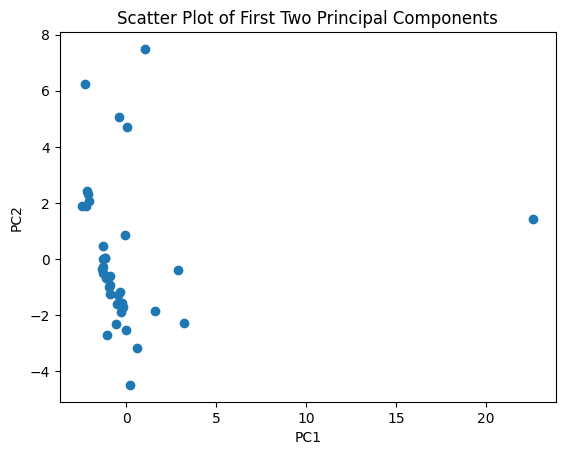

In [52]:
# Plot scatter plot of first two principal components
plt.scatter(pcs['PC1'], pcs['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of First Two Principal Components')

A PCA transformation was applied to our dataset to reduce the dimensionality. We took only the numeric columns which is every column except the user_code and date. We took the first two principal components as it accounts for most of the variance in the data and created a scatter plot to visualize our transformation and capture the variance. 

## Conclusion: Data Quality Assessment

We assess the data quality of the dataset through the following 6 lenses – 

**1. Data Profiling:** We profiled our data through exploratory data analysis (EDA). Our data was sourced from Welltory's COVID-19 and Wearables Open Data Research dataset. The data was collected through the Welltory app via convenience sampling. There may be some selection bias within this data collection as the general population is most likely to be younger individuals who often use their smartphones. As a result, this data may not be applicable to other age ranges. For this report, we only used two CSV files from the dataset: 'surveys' and 'blood_pressure'. More details on the columns and datatypes within these dataframes can be found in our EDA section at the top of this report. The mean survey response value was 2.36 while the means of the different columns in the blood pressure dataset can be found in our graphs within the EDA section.  The distribution of our blood pressure dataset was mostly Gaussian which is illustrated in our figures. To visualize our data, we used a heatmap for the blood pressure and a box plot for the survey. From the heatmap, we noticed there were some high positive correlation between two variables, which might have an impact on our modelling. From the box plot, we were able to visualize the uniqueness of the survey responses of different scales. 

**2. Data Completeness:** The survey dataset had no null values, but ~60% of the blood pressure dataset was null values that were represented by NaN. To deal with the missing values, we used ffill() or bfill() with user codes that had less than 50% missing values. For user codes with more missing values, we created linear regression and KNN models to generate a prediction. We also noticed within the blood pressure dataset that there were some noticable outliers. After further analysis, we found that there was only one outlier out of our range, so we dropped it instead of imputing with the team. 

**3. Data Accuracy:** We checked our data across trusted sources to validate the accuracy. For example, we compared the diastole and systole values in the blood pressure dataset to trusted papers and health websites online. After determining a resonable range of values, we were able to check the accuracy of our data and there was only one observation that was out of the range. This is how we determined our outlier where we dropped the observation to ensure accuracy of our datasets. 

**4. Data Consistency:** Our data seemed consistent across the sources, formats and time periods. One thing that interfered with our data consistency was the presence of missing values but we developed a strategy to handle and fill in the missing values. We used certain functions or models to ensure that the filled in missing values were still consistent. 

**5. Data Integrity:** We enforced data constraints on the blood pressure dataset by setting valid value ranges. This is connected to our data accuracy assessment where we checked our data across data sources to determine a reasonable range of values. From this range, we filtered out data that did not meet the constraints. 

**6. Data Lineage & Provenance:** Our data was sourced from the Welltory app and may be biased towards younger individuals who have a habit of using smartphones. Missing values were filled in based of a specific algorithm while outliers were dropped from the dataset. These two dataset were combined based on user_code and the date, with the values in the other columns averaged. The scales row was also seperated into individual columns with the 'value' column as the value within the cells. A new feature was also added which gives the average response value by a user for a given date. The numeric features of our new dataset were standardized for PCA transformation. The objective of PCA was to reduce the dimensionality of the dataset where we focused on the first two principal components as it accounts for the majority of variance in the dataset. All of the steps mentioned have been documented in our report above. 